In [118]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [166]:
# read labels
csv = pd.read_csv('hospital_ready_shuffle.csv')
labels = csv.columns[:-1]

In [168]:
len(labels)

73

In [169]:
my_data = genfromtxt('hospital_ready_shuffle.csv', delimiter=',')[1:]
X = my_data[:,:-1]
Y = my_data[:, -1]

In [170]:
# scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[:60000,:]
X_test = X[60000:,:]
Y_train = Y[:60000]
Y_test = Y[60000:]

In [171]:
# functions
def get_error(y1, y2):
    return np.mean(abs(y1-y2))

def get_acc_lr(y1, y2, labels):
    right = 0
    for i in range(len(y1)):
        diff = [abs(y1[i] - label) for label in labels]
        idx = np.argmin(diff)
        y1[i] = labels[idx]
    
    return sum(y1==y2)/len(y1)
    

In [172]:
# fit model
reg = LogisticRegression().fit(X_train, Y_train)
Y_head = reg.predict(X_train)

/home/jinwei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jinwei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [173]:
Y_testh= reg.predict(X_test)
Y_trainh = reg.predict(X_train)

In [174]:
print(get_error(Y_testh, Y_test))
print(get_acc(Y_testh, Y_test, [1,2,3]))

0.6926549748220178
0.6092203507553394


In [175]:
print(get_error(Y_trainh, Y_train))
print(get_acc(Y_trainh, Y_train, [1,2,3]))

0.6927166666666666
0.6097166666666667


In [176]:
# visualize the coef
# class 0
coef0 = []
for i in range(len(reg.coef_[0])):
    coef0.append((abs(reg.coef_[0][i]), i, labels[i], reg.coef_[0][i]))
coef0 = list(reversed(sorted(coef0)))

In [177]:
coef0

[(5.620679438655502, 9, 'number_emergency', -5.620679438655502),
 (5.141517071941854, 10, 'number_inpatient', -5.141517071941854),
 (2.86763171415989, 8, 'number_outpatient', -2.86763171415989),
 (1.3755032019013063, 11, 'number_diagnoses', -1.3755032019013063),
 (1.242636917183217, 26, 'miglitol', -1.242636917183217),
 (0.6820875902896292, 31, 'glipizide.metformin', -0.6820875902896292),
 (0.6295312434698658, 44, 'diabetesMed_No', 0.6295312434698658),
 (0.5186579935645586, 41, 'gender_Unknown/Invalid', 0.5186579935645586),
 (0.5062586781911252, 43, 'change_No', 0.5062586781911252),
 (0.46405458935261623, 32, 'metformin.rosiglitazone', 0.46405458935261623),
 (0.4434920183526102, 42, 'change_Ch', 0.4434920183526102),
 (0.41924051133256457, 4, 'time_in_hospital', -0.41924051133256457),
 (0.4133904976800284, 36, 'race_Caucasian', -0.4133904976800284),
 (0.4036086414296799, 25, 'acarbose', -0.4036086414296799),
 (0.38807506074355197, 34, 'race_AfricanAmerican', -0.38807506074355197),
 (0.3

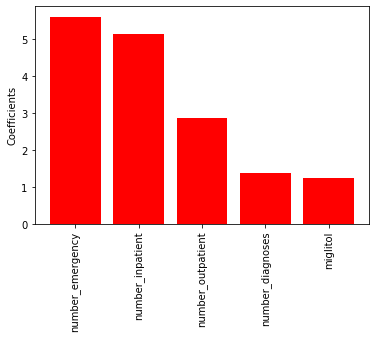

In [178]:
names = [e[2] for e in coef0[:5]]
heights= [e[0] for e in coef0[:5]]
vals = [e[3] for e in coef0[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef0[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class1.jpg',bbox_inches='tight')

In [179]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_emergency :  -5.620679438655502
number_inpatient :  -5.141517071941854
number_outpatient :  -2.86763171415989
number_diagnoses :  -1.3755032019013063
miglitol :  -1.242636917183217


In [180]:
# class1
coef1 = []
for i in range(len(reg.coef_[1])):
    coef1.append((abs(reg.coef_[1][i]), i, labels[i], reg.coef_[1][i]))
coef1 = list(reversed(sorted(coef1)))

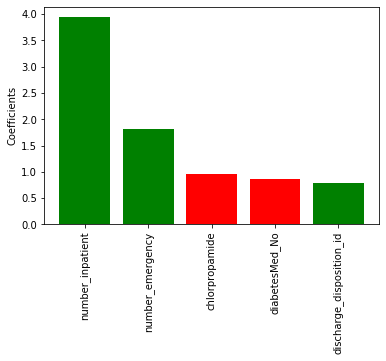

In [181]:
names = [e[2] for e in coef1[:5]]
heights= [e[0] for e in coef1[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef1[:5]]
vals = [e[3] for e in coef1[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class2.jpg', bbox_inches='tight')

In [182]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_inpatient :  3.9396676889847657
number_emergency :  1.8168109769856617
chlorpropamide :  -0.9632726980557582
diabetesMed_No :  -0.8615495027319211
discharge_disposition_id :  0.7805165560333203


In [183]:
# class2
coef2 = []
for i in range(len(reg.coef_[2])):
    coef2.append((abs(reg.coef_[2][i]), i, labels[i], reg.coef_[2][i]))
coef2 = list(reversed(sorted(coef2)))

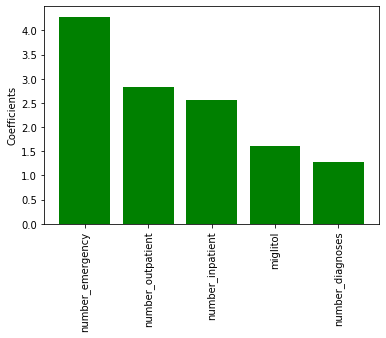

In [184]:
names = [e[2] for e in coef2[:5]]
heights= [e[0] for e in coef2[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef2[:5]]
vals = [e[3] for e in coef2[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class3.jpg', bbox_inches='tight')

In [185]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_emergency :  4.285109442436811
number_outpatient :  2.8359583259919097
number_inpatient :  2.5582402067721772
miglitol :  1.606332132975167
number_diagnoses :  1.2851296546923137
